<a href="https://colab.research.google.com/github/jonaidsharif/Stress-Detection-from-Social-Media-Articles/blob/main/TextClassifi_LogisticRegression%2C_SVM%2C_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly import express
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the data from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/😰Stress Detection from Social Media Articles/Reddit_Combi.csv',
                   sep=';', usecols=['Body_Title', 'label'])

# Display the first few rows of the data
data.head()

,Body_Title,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [ ]:
data.shape

(3123, 2)

In [ ]:
data.info

<bound method DataFrame.info of                                              Body_Title  label
0     Envy to other is swallowing me Im from develop...      1
1     Nothin outta the ordinary. Paradise. Job stres...      1
2     Almost 49 and the chasm of emptiness has never...      1
3     I’m happy again After my closest friend left m...      0
4     Is it possible to recover from such a traumati...      1
...                                                 ...    ...
3118  Positive relief ideas with stress? Hi all, my ...      1
3119  Breakdown I really think I lost my mind last n...      1
3120  I feel as if I actually died a long time ago a...      1
3121  Is it wierd that i have imaginary friends at t...      1
3122  Head and Eye Pressure Since October (for the l...      1

[3123 rows x 2 columns]>

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,3123.0,0.878963,0.326223,0.0,1.0,1.0,1.0,1.0


In [ ]:
data['label'].value_counts()

,count
label,
1,2745
0,378


In [ ]:
print(data.isnull().sum())

Body_Title    0
label         0
dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
express.pie(data_frame=data.copy()['label'].replace({0: 'negative', 1: 'positive'}),
            names='label', color='label')

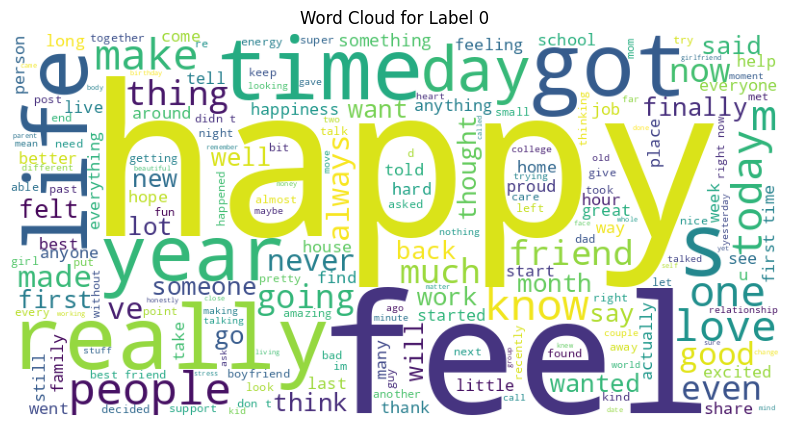

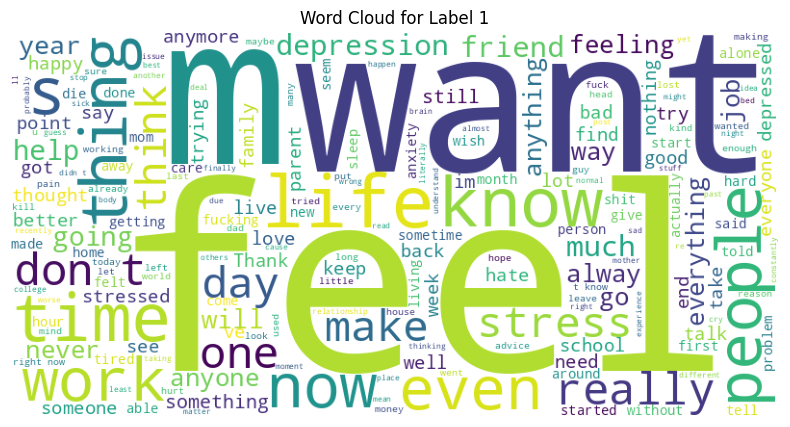

In [ ]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Concatenating all Body_Title for each label
text_0 = " ".join(data[data['label'] == 0]['Body_Title'])
text_1 = " ".join(data[data['label'] == 1]['Body_Title'])

# Generate word clouds for each label
generate_word_cloud(text_0, "Word Cloud for Label 0")
generate_word_cloud(text_1, "Word Cloud for Label 1")

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

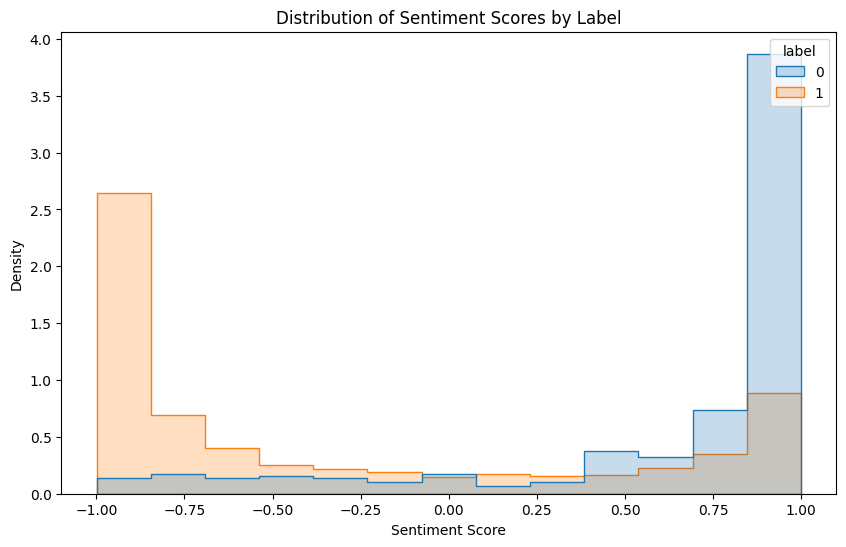

In [ ]:
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer


# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Applying sentiment analysis
data['sentiment_scores'] = data['Body_Title'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plotting sentiment scores distribution for each label
plt.figure(figsize=(10, 6))
sns.histplot(data, x='sentiment_scores', hue='label', element="step", stat="density", common_norm=False)
plt.title('Distribution of Sentiment Scores by Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Ensure that you have the necessary nltk resources downloaded
nltk.download('punkt')
nltk.download('stopwords')
# Text preprocessing
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

data['processed_text'] = data['Body_Title'].apply(preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
#The following line caused the error, it should work now that the module is installed.
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Ensure that you have the necessary nltk resources downloaded
nltk.download('punkt')
nltk.download('stopwords')
# Text preprocessing
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

data['processed_text'] = data['Body_Title'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create a dictionary and corpus needed for Topic Modeling
dictionary = corpora.Dictionary(data['processed_text'])
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

# Build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=3,  # Adjust the number of topics
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Visualizing the topics
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Extracting Sentiment Scores and Text Length
data['sentiment_score'] = data['Body_Title'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['text_length'] = data['Body_Title'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



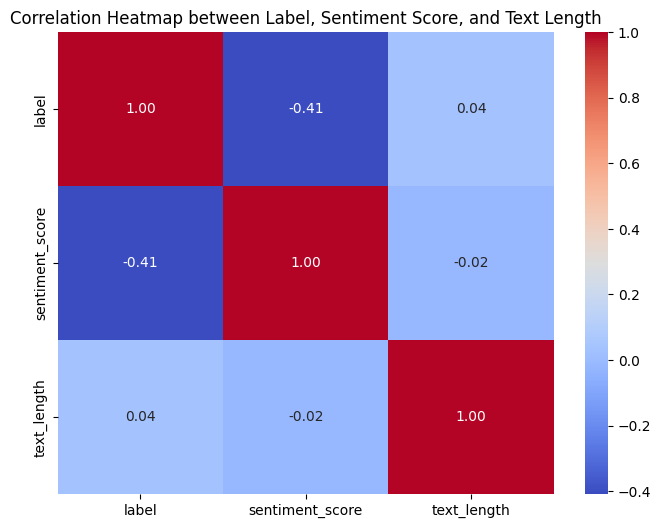

In [ ]:
correlation_matrix = data[['label', 'sentiment_score', 'text_length']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap between Label, Sentiment Score, and Text Length')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
X_train, X_test, y_train, y_test= train_test_split(data['Body_Title'], data['label'], test_size=0.2, random_state=42 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data, and transform the testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)

# XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:40:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
# Creating a DataFrame for accuracies
accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBClassifier'],
    'Accuracy': [lr_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy]
})

print(accuracies)

                 Model  Accuracy
0  Logistic Regression    0.9200
1                  SVM    0.9408
2        Random Forest    0.9008
3        XGBClassifier    0.9232


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear')
scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print("Average cross-validated accuracy of SVM model:", scores.mean())

Average cross-validated accuracy of SVM model: 0.9223374749498998


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validated score: 0.9223374749498998
